In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten

In [4]:
from tensorflow.keras.models import Model,Sequential

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

In [6]:
from tensorflow.keras.preprocessing import image

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

In [8]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [21]:
#RESIZE ALL THE IMAGES
IMAGE_SIZE=[224,224]

train_path="Downloads/Datasets/Datasets/train"
test_path="Downloads/Datasets/Datasets/test"

In [12]:
[224,224]   ##[3] RGB cannel

[224, 224]

In [13]:
resnet=ResNet50(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

In [14]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [15]:
#dont train existing weights
for layer in resnet.layers:
    layer.trainable=False

In [24]:
#useful in getting no. of output classes
folders=glob("Downloads/Datasets/Datasets/train/*")
folders

['Downloads/Datasets/Datasets/train\\audi',
 'Downloads/Datasets/Datasets/train\\lamborghini',
 'Downloads/Datasets/Datasets/train\\mercedes']

In [25]:
x=Flatten()(resnet.output)

In [26]:
x

<tf.Tensor 'flatten/Reshape:0' shape=(None, 100352) dtype=float32>

In [27]:
prediction=Dense(len(folders),activation="softmax")(x)

#creating model object
model=Model(inputs=resnet.input,outputs=prediction)

In [28]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [29]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [31]:
#use the imagedatagenerator for importing the images from folder
train_data_gen=ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

#we dont do data augumentation for test data
test_data_gen=ImageDataGenerator(rescale=1./255)

In [33]:
# we need to give same target size as mentioned for image size
training_set=train_data_gen.flow_from_directory('Downloads/Datasets/Datasets/train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 64 images belonging to 3 classes.


In [34]:
testing_set=test_data_gen.flow_from_directory('Downloads/Datasets/Datasets/test',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 58 images belonging to 3 classes.


In [35]:
#fitting the model
r=model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 14s 7s/step - loss: 5.1454 - accuracy: 0.3125 - val_loss: 11.9924 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 11s 6s/step - loss: 7.3403 - accuracy: 0.3906 - val_loss: 1.9085 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 11s 6s/step - loss: 3.3227 - accuracy: 0.3594 - val_loss: 4.8521 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 11s 6s/step - loss: 4.0078 - accuracy: 0.4062 - val_loss: 4.7488 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 11s 6s/step - loss: 2.8103 - accuracy: 0.3906 - val_loss: 4.9345 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 11s 6s/step - loss: 4.2456 - accuracy: 0.3906 - val_loss: 3.2782 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 11s 6s/step - loss: 2.1926 - accuracy: 0.5156

In [39]:
r.history

{'loss': [5.145400047302246,
  7.3402886390686035,
  3.3226897716522217,
  4.007815361022949,
  2.810267925262451,
  4.245579719543457,
  2.192554235458374,
  2.4978063106536865,
  3.073336124420166,
  1.594973087310791,
  1.5666399002075195,
  1.3563628196716309,
  1.4021596908569336,
  1.6653556823730469,
  0.7453368902206421,
  1.1811481714248657,
  0.6372925043106079,
  0.806206226348877,
  0.70604008436203,
  0.5763516426086426,
  0.6066625714302063,
  0.4696722626686096,
  0.49705928564071655,
  0.3787938952445984,
  0.4870471954345703,
  0.3384721875190735,
  0.33640167117118835,
  0.33944493532180786,
  0.3319114148616791,
  0.34232097864151,
  0.46789389848709106,
  0.32937926054000854,
  0.3630356788635254,
  0.36122849583625793,
  0.3378809690475464,
  0.3139141798019409,
  0.3042858839035034,
  0.28301942348480225,
  0.264464408159256,
  0.28281521797180176,
  0.24729016423225403,
  0.27428990602493286,
  0.30080515146255493,
  0.26808369159698486,
  0.2628015875816345,
  0

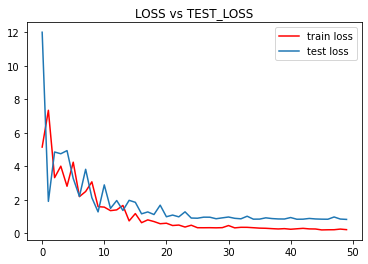

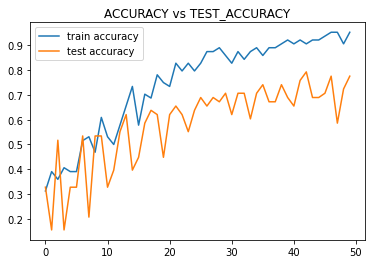

In [49]:
plt.plot(r.history['loss'],label='train loss',color='red')
plt.plot(r.history['val_loss'],label='test loss')
plt.legend()
plt.title("LOSS vs TEST_LOSS")
plt.show()


plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.title("ACCURACY vs TEST_ACCURACY")
plt.show()




In [50]:
# save the file with extension 'h5'
model.save('model_resnet50_car_classification.h5')

In [51]:
y_pred=model.predict(testing_set)
y_pred

array([[7.05048675e-03, 7.48323426e-02, 9.18117166e-01],
       [1.80481258e-03, 9.92608190e-01, 5.58693893e-03],
       [2.14676365e-01, 5.17336726e-01, 2.67986894e-01],
       [2.16750000e-02, 9.54641879e-01, 2.36831307e-02],
       [5.59503958e-02, 5.68486989e-01, 3.75562638e-01],
       [4.30962816e-02, 6.07650902e-04, 9.56296086e-01],
       [3.40770595e-02, 8.48924518e-01, 1.16998389e-01],
       [1.10678978e-01, 5.86510837e-01, 3.02810133e-01],
       [2.00645309e-02, 7.80361950e-01, 1.99573547e-01],
       [1.10960855e-05, 2.35672574e-03, 9.97632146e-01],
       [1.27158721e-03, 9.96390879e-01, 2.33758404e-03],
       [8.16793814e-02, 3.59531380e-02, 8.82367492e-01],
       [2.19985265e-02, 6.72205746e-01, 3.05795699e-01],
       [1.18424810e-01, 3.96342948e-02, 8.41940880e-01],
       [8.47998727e-03, 6.48998141e-01, 3.42521846e-01],
       [2.15233222e-01, 5.74790001e-01, 2.09976822e-01],
       [5.41998029e-01, 3.25895339e-01, 1.32106557e-01],
       [4.14190054e-01, 4.56152

In [52]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 1,
       2, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1], dtype=int64)

In [53]:
from tensorflow.keras.models import load_model

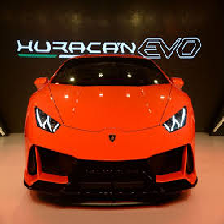

In [57]:
img=image.load_img('Downloads/Datasets/Datasets/Test/lamborghini/10.jpg',target_size=(224,224))
img

In [59]:
#compulsory step converting image to array
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [60]:
x.shape

(224, 224, 3)

In [61]:
x=x/255
x

array([[[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        ...,
        [0.05098039, 0.00784314, 0.        ],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.06666667, 0.02745098, 0.        ],
        [0.06666667, 0.02745098, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       [[0.07058824, 0.03137255, 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        [0.07450981, 0.03529412, 0.        ],
        ...,
        [0.05490196, 0.01176471, 0.00392157],
        [0.05490196, 0.01568628, 0.01176471],
        [0.05490196, 0.01568628, 0.01176471]],

       ...,

       [[0.81960785, 0.5058824 , 0.36078432],
        [0.8235294 , 0.50980395, 0.3647059 ],
        [0.83137256, 0

In [62]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [63]:
model.predict(img_data)

array([[0.03695285, 0.00302889, 0.9600183 ]], dtype=float32)

In [65]:
a=np.argmax(model.predict(img_data),axis=1)
a

array([2], dtype=int64)